# Lab 2.01 - Australian Athletes (ais)

Import all necessary Python libraries and load the AIS dataset from lab exercise 1.01. Also include the code for setting the index and conversion to categorical variables!

In [15]:
#imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
import altair as alt                                # Alternative visualisation system
ais = pd.read_csv("../data/ais.csv")
ais.head()
ais.set_index(['id'])
ais.sex = ais.sex.astype("category")
ais.sport = ais.sport.astype("category")

Use an appropriate chart type to visualise the following variables. Are several chart types suitable? Make one of each! Note how some graphs nevertheless give a better insight into the data than other types of graphs.

- `sex`
- `sport`
- `ht` (show this also divided by `sex` and by `sport`.)

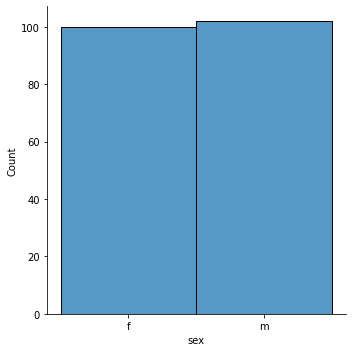

In [7]:
#sex
sns.displot(data=ais["sex"])

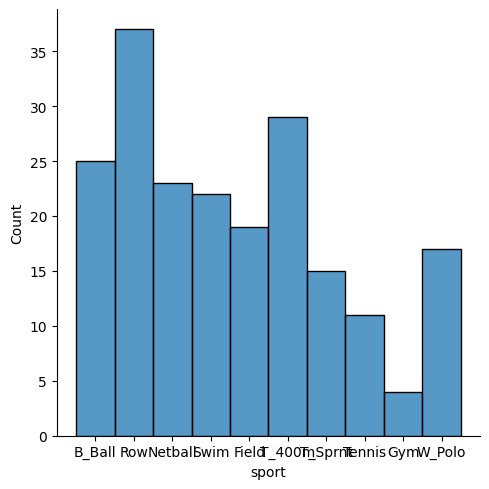

In [11]:
#sports
sns.displot(data= ais["sport"])

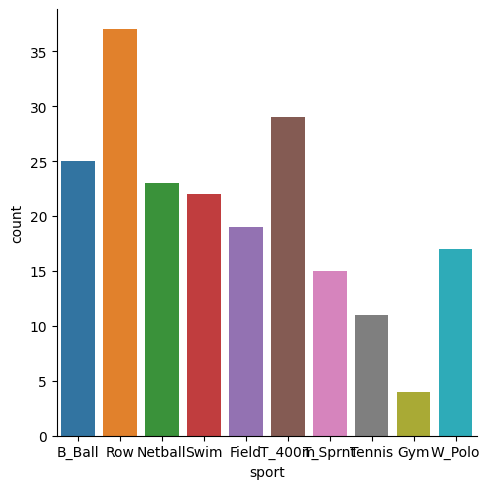

In [10]:
#sports
sns.catplot(data= ais, kind="count", x="sport")

 - `ht` (show this also divided by `sex` and by `sport`.)

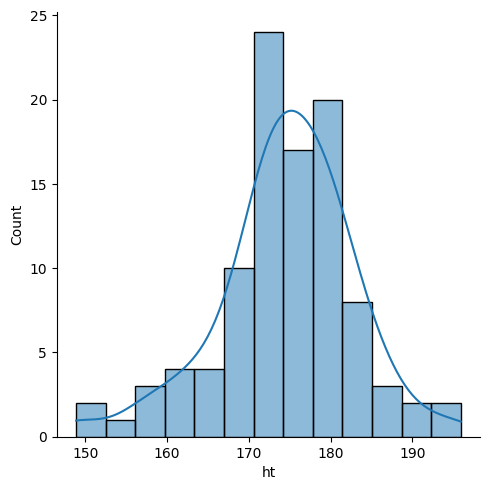

In [12]:
#sex = female +
sns.displot(data=ais[ais.sex=="f"].ht, kde=True)

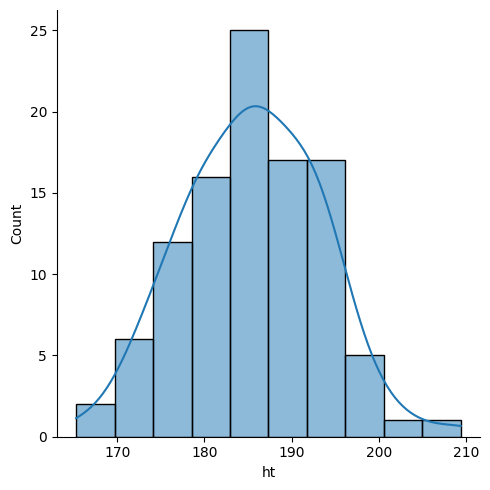

In [13]:
sns.displot(data = ais[ais.sex == "m"].ht,kde = True)

Select the following subsets from the dataset and calculate for each the appropriate measures of central tendency (and, when possible, dispersion) of the variables `ht` and `sex`:

1. the rowers
2. the rowers, netball and tennis players together
3. the female basketball players and rowers together

In [32]:
print("Selection 1 ********************************")
female = ais[(ais.sex == "f") & (ais.sport == "Row")]
print(f"female: { female.id.count()}")
male = ais[(ais.sex == "m") & (ais.sport == "Row")]
print(f"Male: { male.id.count()}")

print("mode: "+ais[ais.sport=="Row"].mode()["sex"][0])

print("Selection 2 ********************************")
female = (ais.sex == "f")
fdf = ais[female]
femalesports = fdf[(ais.sport == "Row") | (ais.sport == "Netball") | (ais.sport == "Tennis")]
print(f"female: { femalesports.id.count()}")

male = (ais.sex == "m")
mdf = ais[male]
malesports = mdf[(ais.sport == "Row") | (ais.sport == "Netball") | (ais.sport == "Tennis")]
print(f"female: { malesports.id.count()}")
print("mode: " + ais[(ais.sport == "Row") | (ais.sport == "Netball") | (ais.sport == "Tennis")].mode()["sex"][0])


Selection 1 ********************************
female: 22
Male: 15
mode: f
Selection 2 ********************************
female: 52
female: 19
mode: f


C:\Users\yoran\AppData\Local\Temp\ipykernel_4792\1551122218.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  femalesports = fdf[(ais.sport == "Row") | (ais.sport == "Netball") | (ais.sport == "Tennis")]
C:\Users\yoran\AppData\Local\Temp\ipykernel_4792\1551122218.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  malesports = mdf[(ais.sport == "Row") | (ais.sport == "Netball") | (ais.sport == "Tennis")]


In [35]:
rowers = ais[ais.sport == "Row"].ht
print(f"Mean:                {rowers.mean()}")
print(f"Standard deviation:  {rowers.std()}") # Pay attention: n-1 in the denominator
print(f"Variance:            {rowers.var()}") # Pay attention: n-1 in the denominator
print(f"Skewness:            {rowers.skew()}")
print(f"Kurtosis:            {rowers.kurtosis()}")

# Median & co
print(f"Minimum:   {rowers.min()}")
print(f"Median:    {rowers.median()}")
print(f"Maximum:   {rowers.max()}")
percentiles = [0.0, 0.25, 0.5, 0.75, 1.0]
print("Percentiles", percentiles, "\n", rowers.quantile(percentiles))
print("Inter Quartile Range:", rowers.quantile(.75) - rowers.quantile(.25))
print(f"Range :    {rowers.max() - rowers.min()}")

Mean:                182.3756756756757
Standard deviation:  7.798376091832815
Variance:            60.81466966966965
Skewness:            -0.9519631183854053
Kurtosis:            2.9203632716558277
Minimum:   156.0
Median:    181.8
Maximum:   198.0
Percentiles [0.0, 0.25, 0.5, 0.75, 1.0] 
 0.00    156.0
0.25    179.3
0.50    181.8
0.75    186.3
1.00    198.0
Name: ht, dtype: float64
Inter Quartile Range: 7.0
Range :    42.0


## Check your answers

As a check, here are the results of the last question. First the frequencies and mode of the variable `sex`:

|           | Selection 1 | Selection 2 | Selection 3 |
| :-------- | :---------- | :---------- | :---------- |
| **f**     | 22          | 52          | 35          |
| **m**     | 15          | 19          | 0           |
| **mode**  | f           | f           | f           |

Then the relevant measures for central tendency and dispersion for `ht` (max. 3 decimal places):

| Statistic  | Selection 1 | Selection 2 | Selection 3 |
| :--------- | :---------- | :---------- | :---------- |
| mean       | 182.376     | 179.066     | 180.126     |
| stdev      | 7.798       | 7.936       | 7.144       |
| min        | 156         | 156         | 156         |
| Q1         | 179.3       | 174.25      | 177.4       |
| median     | 181.8       | 179.5       | 179.7       |
| Q3         | 186.3       | 183.4       | 184.65      |
| max        | 198         | 198         | 195.9       |
| IQR        | 7           | 9.15        | 7.250       |